In [36]:
#import necessary libraries
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import train_test_split
%matplotlib inline
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier

In [37]:
# Loading Iris Dataset.
from sklearn.datasets import load_iris
data = load_iris()

In [38]:
#Exploring Dataset.
data
data.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [39]:
#Creating DataFrame.
df = pd.DataFrame(data.data)
df.columns = data.feature_names
df['Species'] = data.target


In [40]:
#Data Splitting.
X = df.drop('Species',axis=1)
y = df['Species']

In [41]:
#Train-Test Split.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)


In [42]:
#Finding the Optimal K.
k_range = range(1,26)
scores = []
for k in k_range:
       knn = KNeighborsClassifier(n_neighbors = k)
       knn.fit(X_train,y_train)
       y_pred = knn.predict(X_test)
       scores.append(accuracy_score(y_test,y_pred))


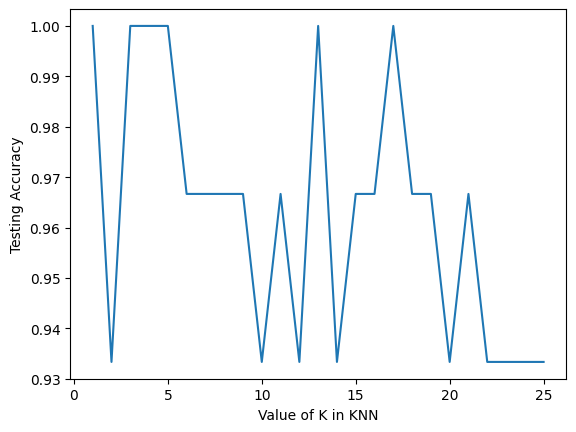

In [43]:
#Plotting Accuracy vs. K.
plt.xlabel("Value of K in KNN")
plt.ylabel("Testing Accuracy")
plt.plot(k_range,scores)


In [44]:
#Training a KNN Model with Optimal K.
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)


KNeighborsClassifier()

In [45]:
#Evaluating Model Performance.
y_pred = knn.predict(X_test)
print("Accuracy Score:{:.2f}%".format(accuracy_score(y_test,y_pred)*100))


Accuracy Score:100.00%


In [47]:
#F1 Score Calculation.
print("f1 score:",f1_score(y_test,y_pred,average="weighted"))

f1 score: 1.0


In [48]:
#F1 Score Calculation.
df = df.replace({0:"setosa",1:'versicolor',2:'virginica'})
test = df.sample(1).values


In [49]:
#.Predicting and Displaying Result.
if knn.predict(test[:,0:4]) == 0:
       print("Species : setosa")
elif knn.predict(test[:,0:4]) == 1:
       print("Species : versicolor")
else:
       print("Species : virginica")


Species : setosa
